# Analisi dei percorsi {#sec-path-analysis}

**Prerequisiti**

**Concetti e Competenze Chiave**

**Preparazione del Notebook**

In [6]:
# Carica il file _common.R per impostazioni di pacchetti e opzioni
here::here("code", "_common.R") |> source()

# Carica pacchetti aggiuntivi
pacman::p_load(
    lavaanExtra, lavaanPlot, semTools, DiagrammeRsvg, tidyr, 
    rsvg, diagram
)

Caricamento dei namespace richiesti: pacman



## Introduzione

Le visualizzazioni rivestono un ruolo fondamentale nel comunicare in modo chiaro e sintetico le relazioni tra variabili. Questo è particolarmente evidente quando si opera con modelli di equazioni strutturali (SEM) che delineano una rete di interconnessioni tra variabili sia osservabili che latenti. In tali contesti, i ricercatori frequentemente si avvalgono di strumenti grafici per agevolare la specificazione e l'esplicitazione del modello, oltre che per presentare in maniera comprensibile i risultati ottenuti.

L'analisi del percorso, o *path analysis*, è una tecnica statistica multivariata utilizzata nell'ambito della ricerca quantitativa per esaminare e descrivere le relazioni causali tra un insieme di variabili. Questo metodo si avvale di modelli grafici, noti come diagrammi di percorso, che rappresentano le relazioni ipotizzate tra le variabili, illustrando graficamente le relazioni dirette, indirette e reciproche tra di esse.

Il fulcro dell'analisi del percorso è la decomposizione e la quantificazione delle relazioni tra le variabili, permettendo agli analisti di distinguere tra effetti diretti, indiretti e totali. Gli effetti diretti corrispondono all'influenza immediata che una variabile esercita su un'altra, mentre gli effetti indiretti rappresentano l'impatto mediato attraverso una o più variabili intermedie. L'effetto totale è la somma degli effetti diretti e indiretti.

Sewall Wright, un genetista che operava presso il Dipartimento dell'Agricoltura degli Stati Uniti, fu il precursore nello sviluppo dei diagrammi di percorso per descrivere i modelli di equazioni strutturali già negli anni '20 del secolo scorso. Questa sua innovazione ha permesso di ottenere una rappresentazione visiva delle connessioni tra variabili, aprendo la strada all'analisi del percorso.

Con il trascorrere del tempo, questa metodologia è stata adottata con successo come uno strumento efficace per discriminare gli effetti diretti da quelli indiretti nelle relazioni tra variabili. Inoltre, essa si è dimostrata di grande utilità nel valutare la solidità e la validità delle relazioni causali ipotizzate all'interno dei modelli di equazioni strutturali.

## Path diagram

Il diagramma del percorso, noto anche come "path diagram," costituisce uno strumento per la rappresentazione grafica delle relazioni tra variabili all'interno di un modello. All'interno di questo diagramma, le variabili latenti o non osservate sono rappresentate mediante cerchi o ellissi, mentre le variabili osservate sono rappresentate da quadrati o rettangoli. 

All'interno del path diagram, è possibile individuare due categorie di variabili: quelle che subiscono influenze da parte di altre variabili nel sistema e quelle che svolgono il ruolo di generatori di effetti. Nello specifico, le variabili esogene costituiscono elementi esterni al sistema in esame, operando in qualità di variabili indipendenti che generano effetti causalmente. Al contrario, le variabili endogene possono agire sia come risultati di altre variabili che come cause per ulteriori variabili, oppure possono essere strettamente variabili dipendenti. Le origini causali delle variabili endogene trovano collocazione all'interno del path diagram, mentre quelle delle variabili esogene si trovano esternamente al diagramma. Tale distinzione presenta affinità con la distinzione tra variabili indipendenti e dipendenti all'interno dei modelli lineari.

Un diagramma di percorso è costituito dai seguenti simboli grafici.

1. Variabili osservate (indicatori) rappresentate con quadrati o rettangoli.
2. Proxy per variabili latenti, come fattori comuni con indicatori multipli, rappresentate con cerchi o ellissi.

Il diagramma di percorso mette in evidenza le interazioni tra le variabili d'interesse, sottolineando i legami causali o associativi che le connettono. Le frecce unidirezionali (ad esempio,$\rightarrow$) illustrano relazioni causali: una variabile subisce influenza da un'altra variabile collegata attraverso una freccia. Invece, le frecce curve bidirezionali denotano relazioni associative, senza implicare una causalità diretta tra le variabili, ovvero covarianze (nella soluzione non standardizzata) o correlazioni (nella soluzione standardizzata).

L'assenza di una freccia tra due variabili nel diagramma suggerisce l'assenza di correlazione tra di esse. Nel caso della @fig-path-01, si illustrano le relazioni tra nove variabili osservate e tre variabili latenti mediante il path diagram.

::: {#fig-path-01}
![](../../figures/path_01.png){width="40%"}

Diagramma di percorso per un modello a tre fattori comuni.
:::

Una freccia curva bidirezionale che si collega a una singola variabile rappresenta la varianza residua della variabile, ovvero la quota di varianza non spiegata dalle relazioni causali illustrate nel diagramma di percorso. Un triangolo contenente il numero 1 simboleggia la media di una variabile (qui non presente).

### Parametri nei Modelli di Equazioni Strutturali

I parametri nei modelli di equazioni strutturali possono essere categorizzati come segue, quando le medie non sono oggetto di analisi:

1. **Varianze e Covarianze delle Variabili Esogene:** 
   - Questi parametri rappresentano la variabilità intrinseca delle variabili esogene (quelle non influenzate da altre nel modello) e le relazioni reciproche tra di esse.

2. **Effetti Diretti sulle Variabili Endogene da Altre Variabili:**
   - Questi parametri descrivono come le variabili endogene sono influenzate direttamente da altre variabili nel modello.

In termini di specificazione, un parametro nel modello può essere classificato come libero, fisso o vincolato:

- **Parametro Libero:** 
   - Questo tipo di parametro è stimato dal software statistico utilizzando i dati a disposizione.

- **Parametro Fisso:** 
   - Un parametro fisso è definito per essere uguale a una costante specificata a priori. In questo caso, il software accetta il valore costante come stima, indipendentemente dai dati. Ad esempio, l'ipotesi che la variabile X non abbia effetti diretti su Y corrisponde alla specifica che il coefficiente per il percorso da X a Y sia fissato a zero.

- **Parametro Vincolato:** 
   - In questo caso, il parametro segue certe restrizioni imposte nell'analisi, che possono essere basate su teorie o ipotesi precedenti. Ad esempio, l'analista può assumere che due paraemetri siano uguali.

## Gradi di Libertà nei Modelli Parametrici

In statistica, la complessità di un modello parametrico, in termini di parametri da stimare, è limitata dalla quantità di informazioni statistiche fornite dai dati. Questo non equivale alla dimensione del campione ($N$), ma si riferisce al numero di varianze e covarianze uniche che si possono derivare dalla matrice di covarianza campionaria in forma triangolare inferiore.

La quantità di informazioni statistiche disponibili in un modello si calcola come segue:

- Se $v$ è il numero di variabili osservate, la quantità di informazioni è data dalla formula:

$$\frac{v(v + 1)}{2},$$

quando le medie delle variabili non sono incluse nell'analisi.

Ad esempio, se $v = 5$ (cioè ci sono 5 variabili osservate nel modello), la quantità di informazioni statistiche sarà:

$$\frac{5 \times 6}{2} = 15.$$

Questo valore (15) rappresenta il numero totale di varianze (5) e covarianze uniche (10) che si trovano sotto la diagonale principale nella matrice di covarianza campionaria. In questo caso, il massimo numero di parametri stimabili è 15. Un modello più semplice potrebbe stimare un numero inferiore di parametri, ma non più di 15. La quantità di informazioni statistiche non dipende dalla dimensione del campione: anche se ci fossero 100 o 1000 casi, con 5 variabili misurate, la quantità di informazioni resterebbe 15. Solo l'aggiunta di nuove variabili osservate può incrementare questo numero.

La differenza tra la quantità di informazioni statistiche ($p$) e il numero di parametri liberi ($q$) determina i gradi di libertà del modello ($df_M$), che si calcolano come:

$$df_M = p - q.$$

Perché un modello sia identificabile, è necessario che i gradi di libertà siano almeno pari a zero ($df_M \geq 0$). Se il numero di parametri da stimare supera la quantità di informazioni disponibili ($df_M < 0$), il modello non è identificabile e non sarà possibile stimare i parametri in modo univoco, poiché esisterebbero infinite soluzioni possibili. Tentare di stimare un modello con gradi di libertà negativi genera solitamente errori nei software di modellazione. In questi casi, il modello deve essere ridefinito riducendo il numero di parametri liberi, ad esempio, imponendo vincoli o fissando alcuni parametri a valori specifici.

Un modello con zero gradi di libertà ($df_M = 0$) si adatta perfettamente ai dati di un campione, così come a qualsiasi altro campione delle stesse variabili. Tuttavia, i modelli con gradi di libertà positivi ($df_M > 0$) generalmente non offrono un adattamento perfetto, lasciando spazio a discrepanze tra i dati osservati e le stime del modello. Raykov e Marcoulides (2006) hanno descritto i gradi di libertà come dimensioni lungo le quali un modello può potenzialmente essere rifiutato. Pertanto, i modelli che risultano validi con maggiori gradi di libertà hanno superato un rischio maggiore di rifiuto. Questo rafforza il principio di parsimonia: a parità di adattamento ai dati, è preferibile il modello più semplice, purché sia teoricamente plausibile.

## Raffigurazione della Varianza Residua nelle Variabili Endogene

La @fig-kline_7_2 mostra la relazione tra due variabili osservabili. L'effetto totale presunto di X su Y è illustrato tramite un percorso diretto, rappresentando l'effetto causale lineare di X su Y. La varianza di X, una variabile esogena, è un parametro libero e viene rappresentata nella figura con il simbolo RAM che indica una varianza (indicata da una freccia curva bidirezionale). Al contrario, la varianza di Y, una variabile endogena, non è libera di variare; invece, è associata a una variabile latente D, il termine di disturbo o errore, che rappresenta la variazione in Y non spiegata da X.

::: {#fig-kline_7_2}
![](../../figures/kline_7_2.png){width="80%"}

Diagramma per una rappresentazione contratta nel modello completo di azione reticolare McArdle-McDonald (RAM) con simbolismo grafico (a) rispetto a una versione più compatta (b). (Figura adattata da @kline2023principles)
:::

Il numero (1) vicino al percorso nella @fig-kline_7_2 (a) è una costante di scala che assegna una metrica al termine di disturbo. Questa specificazione è essenziale perché la varianza del termine di disturbo è latente e le variabili latenti richiedono che un fattore di scala sia fissato per la loro stima. Questa costante di scala è nota anche come il *vincolo di identificazione del carico unitario* (*unit loading identification* constraint, ULI). Il valore "1" comunica al software di suddividere la varianza totale (osservata) di Y in due componenti distinte (ortogonali): la varianza spiegata da X e la varianza non spiegata (o varianza del disturbo,$var_D$).

La rappresentazione nella @fig-kline_7_2 (b) fornisce le stesse informazioni in modo più sintetico. Alternativamente, nella @fig-kline_7_2 (a) si potrebbe rappresentare la varianza residua di Y con una freccia curva bidirezionale, al posto di utilizzare il termine di disturbo D identificato dal vincolo di identificazione del carico unitario. Il valore numerico associato a questa freccia curva bidirezionale sarebbe lo stesso di quello che si ottiene con la rappresentazione della variabile latente di disturbo:$1 \times var_D \times 1$.

Un'altra rappresentazione equivalente assegnerebbe il valore 1 a $var_D$ e attribuirebbe alla freccia causale da D a Y il valore $\sqrt{var_D}$. Il risultato finale sarebbe identico, in quanto anche in questo caso la varianza residua di Y sarebbe rappresentata come$\sqrt{var_D} \times 1 \times \sqrt{var_D}$.

Proseguendo la discussione sulla varianza del disturbo, possiamo identificare quattro fonti principali che contribuiscono a questa varianza:

1. **Variazione Sistematica da Cause Non Misure**: Questa varianza origina da fattori non misurati che influenzano sistematicamente l'esito della variabile di interesse. Si tratta di influenze esterne o variabili nascoste che hanno un impatto significativo ma non sono incluse nel modello.

2. **Variazione Casuale Intrinseca**: Questo tipo di varianza è una caratteristica fondamentale di quasi tutti i sistemi o variabili individuali. Rappresenta la variabilità naturale che esiste indipendentemente dalle misure o dagli effetti che si tenta di analizzare.

3. **Errore di Misurazione Casuale**: Questa varianza è legata agli errori che si verificano durante il processo di misurazione. Includono gli errori casuali che possono essere stimati attraverso analisi di affidabilità, come l'accuratezza e la precisione degli strumenti di misurazione utilizzati.

4. **Mancata Specificazione della Corretta Forma Funzionale dell'Effetto Causale**: Questa varianza emerge quando la forma funzionale dell'effetto causale nel modello non corrisponde alla vera natura della relazione. Un esempio comune è modellare una relazione come lineare quando in realtà è non lineare, portando a una rappresentazione imprecisa del fenomeno sotto indagine.

Nel pannello (a) della @fig-kline_7_2, il percorso da D a Y rappresenta l'effetto diretto di tutte queste cause omesse, oltre agli errori, sulla variabile endogena Y. In sostanza, questo percorso simboleggia l'insieme di tutte le influenze non incluse nel modello che possono impattare su Y. È importante notare che, mentre queste fonti di varianza del disturbo possono essere teoricamente distinte, nella pratica possono sovrapporsi e interagire tra loro.

Proseguendo il discorso sulla rappresentazione della varianza residua nelle variabili endogene, è importante notare che diversi software SEM trattano in modi differenti i termini di errore nei modelli di equazioni strutturali. Ad esempio, nella sintassi del software lavaan, il comando:

```R
Y ~ X
```

direttamente istruisce il software a regredire la variabile Y su X e a gestire automaticamente il termine di disturbo, come rappresentato nel pannello (a) della @fig-kline_7_2. Questo comando, oltre a definire l'effetto di X su Y, stabilisce anche che le varianze di X e il termine di disturbo di Y sono parametri liberi da stimare.

Da queste considerazioni emergono due requisiti fondamentali per l'identificazione di un modello a percorsi:

1. I gradi di libertà del modello ($df_M$) devono essere maggiori o uguali a zero.
2. Ogni variabile latente, inclusi i termini di errore, deve avere una scala definita (una metrica assegnata).

Il conteggio dei parametri liberi è una componente cruciale nel calcolo dei $df_M$. L'inclusione esplicita delle costanti di scala nei diagrammi serve come promemoria per i ricercatori sulla necessità di assegnare una scala alle variabili latenti.

Il pannello (b) della @fig-kline_7_2 mostra una versione più sintetica del modello, utilizzando un simbolismo grafico che omette i simboli per i parametri di varianza (per X, D), la costante di scala (1) e la rappresentazione grafica del disturbo come variabile latente. Questo diagramma fornisce una visione meno dettagliata del modello, evidenziando solamente le relazioni di base, ovvero X che causa Y, e Y influenzata da un termine di disturbo.

### Considerazioni sugli Errori di Misurazione nei Modelli a Percorsi

Riprendendo la discussione sulla @fig-kline_7_2, possiamo delineare le seguenti ipotesi fondamentali:

1. **Affidabilità della Variabile Esogena X**: Si assume che i punteggi sulla variabile esogena X siano privi di errore, ovvero perfettamente affidabili, con un coefficiente di affidabilità ($r_{XX}$) di 1.0.

2. **Correttezza della Direzione Causale**: La relazione causale da X a Y è assunta come correttamente specificata e caratterizzata da una stretta linearità.

3. **Indipendenza delle Cause Non Misurate di Y da X**: Si presume che le cause non misurate (latenti) di Y non siano correlate con X, escludendo quindi l'esistenza di cause comuni non misurate che influenzano simultaneamente entrambe le variabili -- ricordiamo la discusione precedente sull'errore di specificazione.

In ambito di modellazione dei percorsi, l'assunzione che le variabili esogene siano prive di errori di misurazione riflette un presupposto simile a quello adottato nelle regressioni multiple standard, dove i predittori sono considerati esenti da errori di misurazione. Questa assunzione è necessaria poiché le variabili esogene nei modelli a percorsi non includono termini di errore, rendendo impossibile incorporare l'errore casuale in tali modelli. Al contrario, nelle variabili endogene di tali modelli, la presenza di termini di errore permette di tenere conto dell'errore di misurazione.

Nel caso di una regressione bivariata, un errore di misurazione presente solo nella variabile dipendente Y influisce sul modello aumentando l'errore standard della stima di regressione, riducendo il valore di $R^2$ e diminuendo il valore assoluto del coefficiente di regressione standardizzato, a causa dell'incremento dell'errore di misurazione in Y. Invece, l'errore di misurazione presente solo nella variabile predittiva X (ma non in Y) tende a introdurre un bias negativo nei coefficienti di regressione -- cioè una sistematica sottostima dei veri valori dei coefficienti di regressione.

Quando entrambe le variabili X e Y presentano errori di misurazione, la dinamica risultante è più complessa da prevedere. Se gli errori di misurazione in X e Y sono indipendenti, il risultato più comune è un bias negativo (ossia una sottostima dei coefficienti di regressione della popolazione). Tuttavia, se gli errori di misurazione sono comuni tra X e Y, la regressione potrebbe sovrastimare i coefficienti della popolazione, portando a un bias positivo. È essenziale riconoscere che l'errore di misurazione non causa sempre un bias negativo. Di conseguenza, la presenza di errori di misurazione non modellati nelle variabili esogene può significativamente distorcere i risultati, specialmente in presenza di forti correlazioni tra multiple variabili esogene. Per ridurre questi rischi, si raccomanda di valutare l'affidabilità dei punteggi associati alle variabili esogene. Questa pratica metodologica, che consiste nel verificare la precisione e la consistenza delle misure delle variabili predittive, aiuta a identificare e quantificare eventuali errori di misurazione. Un'accurata stima dell'affidabilità contribuisce a garantire l'integrità e la validità dei risultati dei modelli a percorsi, mitigando l'impatto che gli errori di misurazione possono avere sull'analisi.

### Direzionalità Causale e Forma Funzionale della Relazione X-Y

L'assunzione che la relazione tra le variabili X e Y sia lineare, come presentato nella @fig-kline_7_2, può essere esaminata attraverso l'analisi dei dati. Se si osserva che la relazione è significativamente curvilinea, si può adeguare l'analisi per attenuare il presupposto di linearità. Ciò può essere realizzato attraverso metodi come la regressione polinomiale o la regressione non parametrica, che permettono di modellare relazioni più complesse rispetto a un semplice modello lineare.

Tuttavia, la direzionalità dell'effetto causale rappresenta una sfida differente e non è direttamente testabile attraverso metodi statistici standard. Nell'ambito dei modelli SEM, le direzioni degli effetti causali sono generalmente ipotizzate piuttosto che empiricamente verificate. Questo perché è possibile costruire modelli SEM equivalenti che utilizzano le stesse variabili e hanno lo stesso numero di gradi di libertà ($df_M$), ma con direzioni inverse di alcuni effetti causali. Inoltre, entrambi i modelli, nonostante le differenze nelle direzionalità causali, mostreranno lo stesso grado di adattamento ai dati osservati.

Un'ulteriore ragione per cui la direzionalità causale è tipicamente assunta piuttosto che testata in SEM risiede nella natura degli studi SEM stessi. La maggior parte degli studi SEM si basa su disegni trasversali, dove tutte le variabili sono misurate contemporaneamente, senza una chiara precedenza temporale. In questi contesti, l'unica base per definire la direzionalità causale è l'argomentazione teorica del ricercatore, che deve giustificare perché si presume che X influenzi Y e non viceversa, o perché non si considera una relazione di feedback o causazione reciproca tra le due variabili.

Di conseguenza, la metodologia SEM non è intrinsecamente una tecnica per la scoperta di relazioni causali. Se un modello è corretto, SEM può essere utilizzato per stimare le direzioni, le dimensioni e la precisione degli effetti causali. Tuttavia, questo non è il modo in cui i ricercatori tipicamente impiegano le analisi SEM. Piuttosto, un modello causale viene ipotizzato e poi adattato ai dati basandosi sulle assunzioni delineate. Se queste assunzioni risultano essere errate, anche i risultati dell'analisi saranno invalidi. Questo enfatizza il punto sollevato da Pearl (2000), che sostiene che 

> le ipotesi causali sono un prerequisito essenziale per validare qualsiasi conclusione causale (p. 136). 

Questo implica la necessità di una solida base teorica e concettuale nella formulazione di modelli causali nella modellazione SEM.

### Confondimento nei Modelli Parametrici

Nella teoria dei modelli statistici, l'endogenità si riferisce a una situazione in cui una variabile all'interno di un modello è correlata con i termini di errore. Questo può creare problemi nella stima dei parametri del modello e può portare a conclusioni errate riguardo le relazioni causali tra le variabili. 

Nel contesto del diagramma di una catena contratta della @fig-kline_7_2a, l'endogenità è visualizzata come una covarianza tra la variabile causale misurata X e il disturbo (termine di errore) di Y, indicata con un simbolo specifico. Questo simbolo mostra che c'è una relazione non spiegata tra la causa X e il disturbo associato a Y, suggerendo che X potrebbe non essere una variabile completamente indipendente, come idealmente dovrebbe essere in un modello causale chiaro.

Il modello nella @fig-kline_7_2a (a) non è identificabile per due ragioni principali:

1. **Gradi di libertà negativi (dfM = -1)**: Questo indica che ci sono più parametri da stimare nel modello rispetto al numero di informazioni (osservazioni) disponibili. In sostanza, il modello sta cercando di "apprendere" troppo da troppo pochi dati, il che lo rende statisticamente non identificabile.

2. **Percorso di confondimento non chiuso tra X e D**: Il percorso di confondimento (o back-door) tra X e D indica che c'è una relazione non controllata o non misurata tra la variabile indipendente X e il disturbo D di Y. Poiché D è trattato come una variabile latente (cioè, una variabile non osservata direttamente), questo percorso non può essere chiuso o controllato nel modello. Ciò significa che non possiamo essere sicuri se la relazione osservata tra X e Y è effettivamente causata da X o se è influenzata da altri fattori non considerati nel modello.

In sintesi, l'endogenità in questo contesto si riferisce al problema di avere una variabile indipendente (X) che non è veramente indipendente a causa della sua relazione non spiegata con il termine di errore associato alla variabile dipendente (Y), compromettendo così la chiarezza delle relazioni causali nel modello.

::: {#fig-kline_7_2a}
![](../../figures/kline_7_2a.png){width="80%"}

Endogenità in una catena contratta (a). Identificazione del modello controllando un proxy (P) di una causa comune non misurata (b) e attraverso metodi di variabile strumentale (Z), che affrontano anche l'errore di misurazione nella variabile X (c). Tutti i diagrammi sono mostrati in simbolismo compatto. (Figura tratta da @kline2023principles)
:::

L'endogenità nei modelli parametrici può essere indotta dalle seguenti condizioni:

1. Una causa comune non misurata di X e Y (cioè, un confonditore).
2. Errore di misurazione casuale in X (cioè, $r_{XX} < 1.0$).
3. Causalità reciproca, o X e Y si causano a vicenda (cioè, sono entrambe variabili endogene) in un ciclo di feedback.
4. Errori autoregressivi, dove X è una versione ritardata di Y e gli errori persistono tra le due variabili.
5. Autoregressione spaziale, che si verifica quando i punteggi di ciascun caso sono influenzati da quelli di casi vicini o adiacenti spazialmente.

Nel contesto dei modelli statistici, è possibile affrontare il problema dei confonditori non misurati in due modi principali: attraverso la selezione di covariate appropriate o utilizzando i metodi delle variabili strumentali. Per illustrare, la @fig-kline_7_2a (b) propone l'uso di un proxy (P) che funge da sostituto per un confonditore non misurato che influisce su entrambe le variabili X e Y. In questo contesto, la variabile X è considerata endogena, il che significa che è influenzata dal proxy P (che a sua volta influisce anche su Y), indicando una possibile relazione di causa-effetto tra P e X.

Per chiarire, consideriamo il seguente esempio. Immaginiamo di essere interessati a studiare l'effetto dello stress sulle prestazioni accademiche degli studenti universitari. In questo esempio, "stress" è la variabile X e "prestazioni accademiche" è la variabile Y. Tuttavia, c'è un potenziale confonditore che potrebbe influenzare sia lo stress sia le prestazioni accademiche, ma che non è stato misurato o non può essere facilmente misurato. Questo confonditore potrebbe essere, ad esempio, il "benessere psicologico generale" degli studenti.

In questo caso, un proxy (P) per il benessere psicologico generale potrebbe essere "l'attività fisica regolare", che è più facilmente misurabile. La ricerca ha mostrato che l'attività fisica regolare può influenzare sia il benessere psicologico generale sia lo stress, rendendola un buon proxy per il nostro confonditore non misurato. 

Nel modello, l'attività fisica (il nostro proxy P) presumibilmente influisce sia sulla variabile causale (lo stress) sia sulla variabile di esito (le prestazioni accademiche). Analizzando i dati con questo modello, possiamo cercare di isolare meglio l'effetto dello stress sulle prestazioni accademiche, controllando per l'effetto del benessere psicologico generale tramite il proxy dell'attività fisica. In questo modo, possiamo ottenere una stima più accurata dell'effetto diretto dello stress sulle prestazioni accademiche, riducendo la distorsione potenzialmente causata dal confonditore non misurato.

I metodi delle variabili strumentali, come mostrato nella @fig-kline_7_2a (c), sono utilizzati per affrontare sia i confonditori non misurati sia gli errori di misurazione nella variabile esogena X. Questo viene fatto sostituendo X con una variabile strumentale XZ in un modello di regressione a due stadi (2SLS). In questo approccio, qualsiasi errore di misurazione casuale in X viene trasferito alla variabile strumentale XZ, seguendo le ipotesi standard dei metodi delle variabili strumentali. È importante notare che, nel pannello (c), la variabile X è considerata endogena, sebbene non tutti i ricercatori scelgano di includere variabili strumentali nei loro diagrammi di modelli statistici. Questo approccio consente di isolare meglio l'effetto di X su Y, controllando per le influenze esterne non misurate e gli errori di misurazione.

Per chiarire ulteriormente questi concetti, esamineremo separatamente il modello autoregressivo e l'autoregressione spaziale.

#### Modello Autoregressivo

Un modello autoregressivo è un tipo di modello statistico utilizzato per analizzare dati sequenziali o temporali. In un modello autoregressivo, si prevedono i valori futuri di una variabile basandosi sui suoi valori passati. Questo è particolarmente utile in studi longitudinali o in serie temporali dove si misura la stessa variabile in diversi punti nel tempo.

Nell'esempio della @fig-kline_7_2a (a), immaginiamo che X e Y siano le stesse variabili misurate in due momenti diversi. Ad esempio, X potrebbe essere il livello di ansia di uno studente misurato all'inizio dell'anno scolastico, mentre Y potrebbe essere il livello di ansia dello stesso studente misurato alla fine dell'anno scolastico. In questo caso, stiamo cercando di prevedere i punteggi futuri di ansia (Y) basandoci sui punteggi passati (X).

Un aspetto importante da considerare è che gli errori nelle misure ripetute (le variazioni nei punteggi che non sono spiegati dal modello) possono essere correlati. Ad esempio, se le misurazioni sono fatte in intervalli temporali ravvicinati, le circostanze o gli stati interni che hanno influenzato la prima misurazione potrebbero ancora essere presenti durante la seconda misurazione.

#### Autoregressione Spaziale

L'autoregressione spaziale, invece, si riferisce a un modello che considera le correlazioni spaziali tra dati. Questo tipo di analisi è particolarmente rilevante quando si studiano fenomeni geografici o ambientali. Ad esempio, la diffusione di una malattia in diverse località geografiche potrebbe non essere indipendente: le aree vicine geograficamente potrebbero mostrare pattern simili di diffusione della malattia a causa della loro vicinanza.

In quest'ultimo caso, non stiamo più parlando di misure ripetute nel tempo sulla stessa unità, ma piuttosto di misure effettuate in diverse unità in un contesto spaziale. Le variabili misurate in diverse località fisiche possono influenzarsi a vicenda, e un modello autoregressivo spaziale cerca di catturare queste interdipendenze.

### Modelli con Cause Correlate o Effetti Indiretti

Il modello parametrico mostrato nella @fig-kline_7_3 (a) suggerisce che la variabile Y sia influenzata da due variabili esogene correlate, X e W. Questo significa che X e W sono due fattori esterni che hanno un impatto su Y e tra loro esiste una relazione di covarianza, ovvero tendono a variare insieme in un certo modo. Tuttavia, il diagramma non spiega il motivo della relazione tra X e W, lasciando la loro interdipendenza non esaminata in termini causali. 

::: {#fig-kline_7_3}
![](../../figures/kline_7_3.png){width="80%"}

Modelli con cause correlate (a) e sia effetti diretti che indiretti (b). Tutti i diagrammi sono mostrati in simbolismo compatto. (Figura tratta da @kline2023principles)
:::

Nell'analizzare questi dati con un software, si prenderanno in considerazione gli effetti sia di X che di W, tenendo conto della loro covarianza campionaria. Ciò significa che quando si stimano gli impatti di X e W su Y, si aggiusta per il fatto che X e W sono correlate tra loro. Alcuni software, come `lavaan`, presuppongono automaticamente che tutte le cause esogene misurate che influenzano lo stesso risultato (in questo caso Y) siano correlate. Utilizzando il comando

`Y ~ X + W`

in `lavaan`, si definisce il modello rappresentato nella @fig-kline_7_3 (a), permettendo al software di stimare gli effetti di X e W tenendo conto della loro covarianza osservata. Questo comando specifica inoltre che le varianze di X, W e il disturbo associato a Y sono tutti considerati parametri liberi da stimare.

Se, invece, si ipotizza che le variabili esogene X e W siano indipendenti, ovvero che non ci sia una covarianza tra di loro, si può usare un comando aggiuntivo in `lavaan`

`X ~~ 0*W`

per impostare la covarianza tra X e W a zero. Questo comando mantiene le varianze di X e W come parametri liberi, ma specifica che non c'è una relazione di covarianza diretta tra queste due variabili. In questo modo, il modello considererà X e W come influenze separate e indipendenti su Y.

Nel modello presentato nella @fig-kline_7_3 (a), è importante notare come vengano trattate le interazioni tra le variabili causali X e W. In questo specifico caso, si presume che non ci sia alcuna interazione tra X e W; in altre parole, l'effetto di X sulla variabile di esito Y si assume essere costante a prescindere dai diversi livelli di W, e viceversa. Questa assunzione implica che l'effetto di X su Y è indipendente da W, e l'effetto di W su Y è indipendente da X.

In termini di modellazione, questo significa che stiamo considerando una causalità incondizionata, dove l'effetto di una causa su un esito è costante e non influenzato da altre variabili nel modello. Il modello non prevede, quindi, che l'effetto di X su Y cambi in funzione dei diversi livelli di W. Questo è in contrasto con l'ipotesi di causalità condizionale, dove gli effetti di una variabile su un'altra possono variare in base al livello di una terza variabile. In un modello di causalità condizionale, ad esempio, si potrebbe ipotizzare che l'effetto di X su Y vari a seconda dei diversi livelli di W.

In sintesi, la @fig-kline_7_3 (a) delinea un modello dove le relazioni causali tra X, W e Y sono considerate fisse e non influenzate da potenziali interazioni tra X e W. Questo tipo di modellazione fornisce una visione semplificata delle relazioni causali, che potrebbe essere appropriata in determinate circostanze, ma non tiene conto di possibili dinamiche più complesse tra le variabili.

È fondamentale riconoscere che le ripercussioni degli errori di misurazione in modelli che includono cause correlate sono notevolmente intricate e imprevedibili. Questa complessità deriva principalmente dalla natura del bias che può emergere a seguito di errori di misurazione. In particolare, il bias introdotto da questi errori può manifestarsi in modi diversi, assumendo una forma sia negativa che positiva. Tale variazione dipende da diversi fattori, tra cui se l'errore di misurazione è distribuito in maniera uniforme tra molteplici variabili predittive o se è presente sia nelle variabili predittive che nella variabile di esito. Un altro elemento influente è la natura delle covarianze campionarie tra tutte le variabili coinvolte nel modello.

Data questa complessità, la capacità di modellare esplicitamente gli errori di misurazione all'interno dei modelli SEM rappresenta un vantaggio significativo. Questo approccio permette una maggiore precisione nell'analisi, consentendo di tenere conto delle varie modalità in cui gli errori di misurazione possono influenzare i risultati. La modellazione esplicita degli errori di misurazione in SEM offre quindi la possibilità di ottenere stime più accurate e affidabili, mitigando il rischio di trarre conclusioni errate a causa di bias non riconosciuti o non gestiti adeguatamente.

Nella @fig-kline_7_3 (b), il modello mostra come la variabile X abbia sia effetti diretti che indiretti sulla variabile di esito Y. L'effetto indiretto segue il percorso X → M → Y, dove M funge da variabile intermedia o mediatrice. Questo significa che M è il canale attraverso il quale gli effetti di X sono trasmessi a Y. In questo modello, M è una variabile endogena, nel senso che è influenzata da X (indicato dal percorso X → M), e allo stesso tempo agisce come una variabile causale nei confronti di Y (come indicato da M → Y).

La variabile M assume un doppio ruolo in termini di affidabilità e precisione della misurazione. Da una parte, essendo un esito di X, M è soggetta a disturbi, che includono potenziali errori di misurazione. Dall'altra, nel suo ruolo di causa per Y insieme a X, si presume nelle analisi di regressione che sia X che M siano prive di errore di misurazione. Questa assunzione non presenta problemi se l'affidabilità delle misure su M è elevata, ossia se i punteggi di M sono accurati e consistenti.

In aggiunta, il modello descritto nella @fig-kline_7_3 (b) include tre ipotesi importanti:

1. X ha un effetto diretto su Y, oltre al suo effetto indiretto tramite M.
2. Non ci sono interazioni negli effetti lineari di X e M su Y, il che significa che l'effetto di X su Y è lo stesso a prescindere dai livelli di M, e viceversa.
3. Il modello non omette confonditori potenzialmente importanti tra le coppie di variabili X, M e Y. In altre parole, non ci sono fattori esterni non considerati nel modello che potrebbero influenzare le relazioni tra queste tre variabili.

In sintesi, la @fig-kline_7_3 (b) presenta un modello in cui X influisce su Y sia direttamente che indirettamente attraverso M, e queste relazioni sono considerate prive di interazioni complesse o di confonditori non rilevati.

La gestione degli errori di misurazione e dei confonditori non considerati in modelli che includono effetti causali indiretti rappresenta una sfida notevole, poiché i loro effetti sulle stime possono essere complessi e non sempre prevedibili. Per esemplificare, consideriamo il modello della @fig-kline_7_3 (b) dove si analizza l'effetto indiretto di X su Y attraverso la variabile intermedia M. 

Se assumiamo che non ci siano errori di misurazione nella variabile causale X, qualsiasi errore di misurazione presente nella variabile intermedia M può introdurre un bias negativo nelle stime dell'effetto indiretto di X su Y. Ciò significa che l'effetto indiretto potrebbe essere sottostimato a causa dell'errore in M. D'altro canto, se non si tiene conto dei confonditori tra M e Y, cioè se ci sono variabili o fattori non considerati che influenzano sia M che Y, ciò può portare a un bias positivo, sovrastimando l'effetto indiretto.

Quando entrambe queste situazioni -- errori di misurazione in M e confonditori tra M e Y -- si verificano contemporaneamente, le conseguenze sulle stime dell'effetto indiretto possono variare ampiamente. Potrebbe verificarsi una sovrastima, una sottostima o, in rari casi, nessun bias significativo. Studi di simulazione hanno rivelato che tentare di correggere solo una fonte di bias (come l'errore di misurazione in M) in presenza di entrambi i tipi di bias può addirittura aggravare il problema, portando a stime più distorte rispetto a quelle che non tengono conto di alcun bias.

In sintesi, la valutazione accurata dell'effetto indiretto in un modello che comprende una variabile intermedia richiede un'attenta considerazione sia degli errori di misurazione che dei confonditori potenziali, poiché la loro interazione può influenzare in modi complessi e talvolta inaspettati la validità delle stime.

### Modelli Ricorsivi, Non Ricorsivi e Parzialmente Ricorsivi

Tutti i modelli di percorso parametrici più complessi possono essere "assemblati" a partire dai modelli elementari mostrati nelle figure precedenti. Ci sono due tipi fondamentali di modelli: ricorsivi e non ricorsivi. I modelli ricorsivi hanno due caratteristiche essenziali: tutti gli effetti causali sono unidirezionali e i loro disturbi sono indipendenti. La @fig-kline_7_4 (a) è un esempio di un modello ricorsivo (Tutti i modelli considerati finora sono ricorsivi.) 

I modelli non ricorsivi, invece, hanno cicli causali (feedback) in cui ≥ 2 variabili endogene sono specificate come cause ed effetti l'una dell'altra, direttamente o indirettamente. Nella loro forma non parametrica, corrispondono a grafi ciclici diretti. La @fig-kline_7_4 (b) è un esempio di un modello parametrico non ricorsivo con causazione reciproca rappresentata come

$Y1 \overset{\rightarrow}{\underset{\leftarrow}{}} Y2,$

indicando che le variabili Y1 e Y2 hanno effetti simultanei l'una sull'altra. 

::: {#fig-kline_7_4}
![](../../figures/kline_7_4.png){width="80%"}

Esempi di modelli ricorsivi, non ricorsivi e parzialmente ricorsivi con due diversi schemi di correlazione degli errori. Tutti i diagrammi sono mostrati in simbolismo compatto. (Figura tratta da @kline2023principles)
:::

I modelli che includono cicli causali possono presentare, o meno, covarianze tra i loro termini di disturbo. La presenza di errori correlati in questi modelli implica l'esistenza di ipotesi su cause comuni non misurate che influenzano le variabili in questione.

Ad esempio, nel modello rappresentato nella @fig-kline_7_4 (b), le variabili Y1 e Y2 sono definite come cause reciproche, ovvero ognuna influisce sull'altra. In aggiunta a ciò, se nel modello è specificata una covarianza tra i termini di disturbo $D_1$ e $D_2$, ciò suggerisce che Y1 e Y2 condividono almeno una causa comune non misurata. In altre parole, l'ipotesi è che esistano fattori non osservati che influenzano entrambe le variabili, $Y1$ e $Y2$, e questa influenza comune si manifesta attraverso la covarianza tra i loro termini di disturbo.

Esiste anche un altro tipo di modello di percorso, quello che ha effetti unidirezionali e covarianze dei disturbi. I modelli parzialmente ricorsivi con un pattern di correlazioni dei disturbi senza "archi" possono essere trattati nell'analisi proprio come i modelli ricorsivi. Un pattern senza "archi" significa che gli errori correlati sono limitati a coppie di variabili endogene senza effetti diretti tra di loro, come Y1 e Y2 nella @fig-kline_7_4 (c).

I modelli parzialmente ricorsivi che presentano un pattern di correlazioni dei disturbi caratterizzato dalla presenza di "archi" richiedono un trattamento analitico simile a quello dei modelli non ricorsivi. Un pattern con "archi" si verifica quando esiste una covarianza tra i termini di disturbo di due variabili endogene che sono collegate da un effetto diretto. Ad esempio, nella @fig-kline_7_4 (d), le variabili Y1 e Y2 sono collegate da un effetto diretto e presentano una covarianza tra i loro disturbi $D_1$ e $D_2$.

La presenza di un effetto diretto insieme a disturbi correlati tra due variabili crea un percorso di confondimento nel modello. Un percorso di confondimento è una via attraverso la quale può fluire l'influenza causale indiretta, potenzialmente distorcendo l'interpretazione dei rapporti causali diretti. In questi casi, la selezione di covariate (variabili aggiuntive che potrebbero spiegare parte della relazione osservata) non è sufficiente per "chiudere" o eliminare questo percorso di confondimento. Pertanto, questi modelli richiedono un'attenzione particolare nell'analisi per garantire che le stime degli effetti causali siano accurate e non siano influenzate in modo improprio da questi percorsi di confondimento.

I modelli ricorsivi e quelli parzialmente ricorsivi che non includono cicli causali possono essere efficacemente rappresentati tramite grafi aciclici diretti (DAG). Questo tipo di rappresentazione grafica implica che è possibile applicare tutte le regole di identificazione grafica esposte in questo capitolo. Nei DAG, le relazioni causali sono rappresentate come flussi unidirezionali senza cicli, rendendo più chiaro e diretto l'analisi delle relazioni tra le variabili.

D'altra parte, i modelli non ricorsivi che includono cicli causali, come quello illustrato nella @fig-kline_7_4 (b), sono rappresentati da grafi ciclici diretti. In questi grafi, le variabili possono influenzarsi a vicenda in un ciclo continuo, creando una struttura più complessa. A causa di questa complessità, le regole di identificazione grafica per i grafi ciclici diretti non sono sviluppate quanto quelle per i DAG. Questo significa che analizzare e interpretare i modelli non ricorsivi con cicli causali è più complesso e richiede l'uso di approcci analitici più avanzati o specifici per gestire correttamente le relazioni cicliche tra le variabili.

Possiamo stabilire una regola generale per i modelli di percorso parametrici: i modelli ricorsivi o parzialmente ricorsivi, che presentano schemi di covarianze dei disturbi privi di "archi" e che soddisfano due condizioni specifiche, sono considerati identificati. Queste condizioni sono: (1) i gradi di libertà del modello (dfM) devono essere maggiori o uguali a zero e (2) ogni variabile non misurata, inclusi i termini di errore, deve essere associata a una scala metrica.

Inoltre, i modelli di equazioni strutturali che sono identificati e hanno un numero di osservazioni uguale al numero dei parametri liberi (dfM = 0) sono classificati come "appena identificati". Al contrario, i modelli con più osservazioni rispetto ai parametri liberi (dfM > 0) sono considerati "sovraidentificati".

Un modello di equazioni strutturali può risultare sotto-identificato in due modi distinti: (1) se dfM è inferiore a zero, oppure (2) se, pur avendo un dfM maggiore o uguale a zero, alcuni parametri liberi rimangono sotto-identificati perché non vi sono sufficienti informazioni per la loro stima, anche se altri parametri all'interno dello stesso modello sono identificati. Nel secondo scenario, l'intero modello è considerato non identificato, anche se dfM è maggiore o uguale a zero. In generale, un modello si considera sotto-identificato quando non è possibile stimare in modo univoco tutti i suoi parametri liberi.

## Analisi dei percorsi e regressione bivariata

Cominciamo esaminando l'analisi dei percorsi partendo dall'esempio più semplice, ovvero il modello di regressione lineare. Il modello di regressione bivariata si esprime tramite l'equazione seguente:

$$y_1 = b_0 + b_1 x_1 + \epsilon_1,$$

dove $y$ rappresenta la variabile dipendente, $b_0$ rappresenta l'intercetta, $b_1$ rappresenta la pendenza della retta di regressione, $x$ è la variabile indipendente e $\epsilon$ è il termine di errore.

Nell'ambito della descrizione delle relazioni tra variabili manifeste e latenti, si adotta spesso la notazione LISREL. In questa notazione, il modello presentato in precedenza può essere espresso come segue:

$$y_1 = \alpha + \gamma x_1 + \zeta_1,$$

dove:

- $x_1$: variabile esogena singola,
- $y_1$: variabile endogena singola,
- $\alpha$: intercetta di $y_1$,
- $\gamma_1$: coefficiente di regressione,
- $\zeta_1$: termine di errore di $y_1$,
- $\phi$: varianza o covarianza della variabile esogena,
- $\psi$: varianza o covarianza residuale della variabile endogena.

Il diagramma di percorso per il modello di regressione bivariata è illustrato nella @fig-lisrel_bivariate_reg.

::: {#fig-lisrel_bivariate_reg}
![](../../figures/lisrel_bivariate_reg.png){width="80%"}

Diagramma di percorso per il modello di regressione bivariato.
:::

Facciamo un esempio numerico. Simuliamo tre variabili: x1, x2, y.

In [3]:
set.seed(42)
n <- 100
x1 <- rnorm(n, 90, 20)
x2 <- x1 + rnorm(n, 0, 30)
y <- 25 + 0.5 * x1 + 1.0 * x2 + rnorm(n, 0, 30)

dat <- data.frame(
    y, x1, x2
)

cor(dat) |>
    round(2)

,y,x1,x2
y,1.00,0.55,0.80
x1,0.55,1.00,0.62
x2,0.80,0.62,1.00


Consideriamo la relazione tra `x1` (variabile endogena) e `y` (variabile endogena). In R possiamo adattare ai dati un modello di regressione mediante la funzione `lm`.

In [4]:
m1a <- lm(y ~ x1, data = dat)
summary(m1a)


Call:
lm(formula = y ~ x1, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.462 -29.539  -3.437  29.200 122.234 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.5974    18.9844   1.980   0.0505 .  
x1            1.3286     0.2042   6.508 3.25e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 42.31 on 98 degrees of freedom
Multiple R-squared:  0.3018,	Adjusted R-squared:  0.2946 
F-statistic: 42.35 on 1 and 98 DF,  p-value: 3.251e-09


Usiamo ora lavaan per adattare lo stesso modello ai dati.

In [7]:
m1b <- "
    y ~ 1 + x1
"
fit1b <- sem(m1b, data = dat)
parameterEstimates(fit1b) 

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
y,~1,,37.59740,18.7936187,2.000541,4.544188e-02,0.7625888,74.432220
y,~,x1,1.32865,0.2021064,6.574012,4.897727e-11,0.9325284,1.724771
y,~~,y,1754.10024,248.0672346,7.071068,1.537437e-12,1267.8973923,2240.303084
x1,~~,x1,429.43203,0.0000000,NA,NA,429.4320313,429.432031
x1,~1,,90.65030,0.0000000,NA,NA,90.6502963,90.650296


L'intercetta di `y ~1` (37.597) e il coefficiente di regressione di `y ~ x1` (1.329) corrispondono all'output di `lm()` con piccoli errori di arrotondamento. L'intercetta per `x1 ~1` (90.650) e la sua varianza `x1 ~~ x1` (429.432) descrivono una media ed una varianza esogena e corrispondono alla media e alla varianza univariate:

In [8]:
mean(dat$x1)

[1] 90.6503

In [9]:
var(dat$x1) * (length(dat$x1) - 1) / length(dat$x1)

[1] 429.432

La varianza residua di `y`, `y ~~ y` corrisponde alla quota della varianza osservata della variabile `y` che non è spiegata dalla relazione lineare su `x1`:

In [10]:
var(dat$y) * 99 / 100 - (1.3286 * 429.432 * 1.3286)

[1] 1754.157

La funzione `semPaths` consente di creare un diagramma di percorso a partire dall'oggetto creato da `sem`.

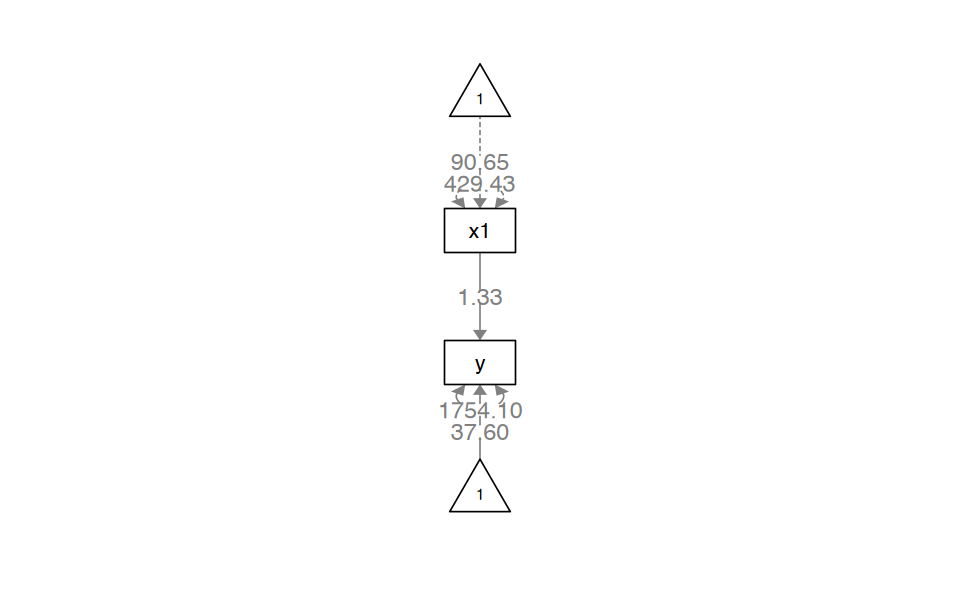

In [13]:
semPlot::semPaths(
    fit1b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram", 
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Analisi dei percorsi e regressione multipla

La regressione semplice è limitata a una sola variabile esogena. Nella pratica, un ricercatore può essere interessato a studiare come un gruppo di variabili esogene possano predire una variabile di esito. Supponiamo di avere ancora una sola variabile di esito endogena ma due predittori esogeni; questo caso è noto come regressione multipla:

$$
y_1 = \alpha_1 + \gamma_1 x_1 + \gamma_2 x_2 + \zeta_1.
$$

Il diagramma di percorso mostra la relazione tra tutte le variabili, comprendendo anche i fattori di disturbo, e fornisce dunque la rappresentazione grafica dell'equazione precedente.

::: {#fig-lisrel_mr}
![](../../figures/lisrel_mr.png){width="80%"}

Diagramma di percorso per il modello di regressione multipla.
:::

I coefficienti di percorso associati alle frecce orientate esprimono la portata del nesso causale e corrispondono ai pesi beta (ovvero ai coefficienti parziali di regressione standardizzati). Le frecce non orientate esprimono la portata della pura associazione tra variabili e dunque corrispondono alle correlazioni/covarianze.

In un diagramma di percorso, il numero di equazioni corrisponde al numero di variabili endogene del modello. Nel caso specifico, poiché vi è una sola variabile endogena (ovvero $y$), esiste un'unica equazione che descrive le relazioni causalitiche interne al path diagram. All'interno di ciascuna equazione, inoltre, il numero di termini corrisponde al numero di frecce orientate che puntano verso la variabile endogena. Nell'esempio sopra citato, pertanto, la sola equazione del modello contiene tre termini, ciascuno associato ad una freccia orientata.

Usando `lm` otteniamo la seguente stima dei coefficienti:

In [14]:
m2a <- lm(y ~ 1 + x1 + x2, data = dat)
fit2a <- summary(m2a) 

Gli stessi risultati si ottengono con lavaan.

In [15]:
m2b <- "
    y ~ 1 + x1 + x2
    x1 ~~ x1
    x2 ~~ x2
    x1 ~~ x2
"

In [17]:
fit2b <- sem(m2b, data = dat)

In [20]:
parameterEstimates(fit2b)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
y,~1,,44.453736,13.4573999,3.303293,9.555645e-04,18.0777172,70.8297555
y,~,x1,0.199143,0.1850347,1.076247,2.818170e-01,-0.1635183,0.5618043
y,~,x2,1.085293,0.1110220,9.775475,0.000000e+00,0.8676940,1.3028924
x1,~~,x1,429.432014,60.7308578,7.071068,1.537437e-12,310.4017199,548.4623082
x2,~~,x2,1192.840139,168.6930702,7.071068,1.537437e-12,862.2077969,1523.4724811
x1,~~,x2,446.926552,84.3793272,5.296636,1.179557e-07,281.5461093,612.3069940
y,~~,y,896.963117,126.8497404,7.071068,1.537437e-12,648.3421938,1145.5840392
x1,~1,,90.650296,2.0722741,43.744355,0.000000e+00,86.5887135,94.7118788
x2,~1,,88.025785,3.4537518,25.487004,0.000000e+00,81.2565556,94.7950138


Esaminiamo il diagramma di percorso.

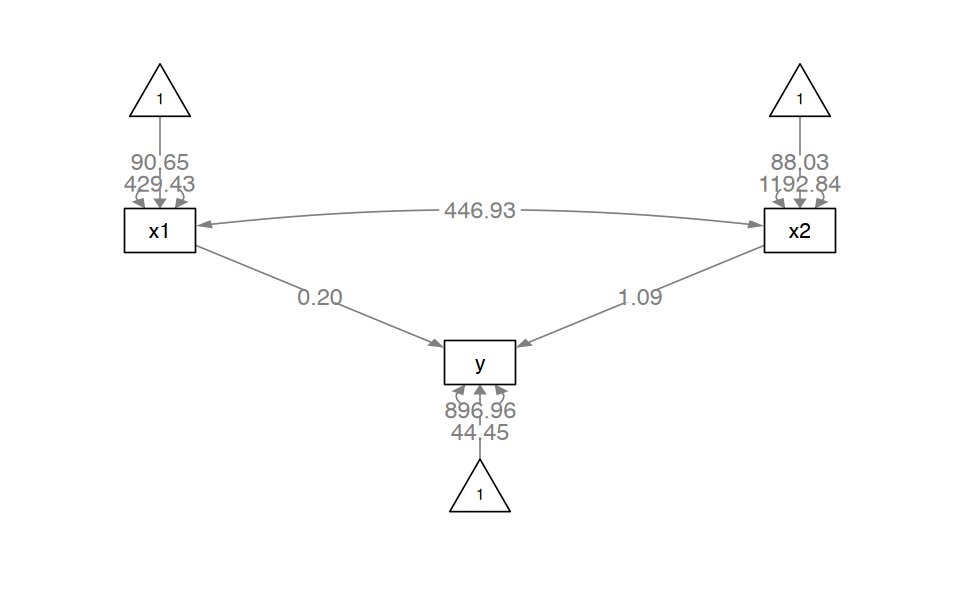

In [21]:
semPlot::semPaths(
    fit2b,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)


## Effetti diretti e indiretti

L'analisi del percorso offre un metodo essenziale per distinguere tra diverse tipologie di effetti che influenzano le variabili in esame: l'effetto diretto, l'effetto indiretto e l'effetto totale. Gli effetti diretti rappresentano l'influenza che una variabile esercita su un'altra senza mediazione di altre variabili intermedie. Gli effetti indiretti, invece, operano attraverso l'intermediazione di almeno una variabile aggiuntiva nel processo. L'effetto totale è la somma cumulativa degli effetti diretti e indiretti.

Nella @fig-path_03, la variabile $y_1$ esercita un effetto diretto sulla variabile $y_2$. Allo stesso tempo, $y_1$ produce un effetto indiretto sulla variabile $y_3$, poiché non esiste una connessione causale diretta tra $y_1$ e $y_3$. Nel contesto rappresentato, la variabile $y_1$ agisce come variabile esogena, mentre le variabili $y_2$ e $y_3$ fungono da variabili endogene.

::: {#fig-path_03}
![](../../figures/path_03.png){width="40%"}

Diagramma di percorso per un modello a catena.
:::

## Le regole di Wright

L'obiettivo primario dell'analisi del percorso consiste nella decomposizione della correlazione (o della covarianza) in base alla somma dei vari percorsi (diretti e indiretti) che collegano due variabili mediante coefficienti noti come "path coefficients." Utilizzando il diagramma del percorso, Sewall Wright (1921, 1934) formulò le regole che, tramite le "tracing rules," stabiliscono il collegamento tra le correlazioni (o covarianze) delle variabili e i parametri del modello. Le tracing rules si possono esprimere nei seguenti termini:

- È possibile procedere in avanti lungo una freccia e poi a ritroso, seguendo la direzione della freccia, ma non è permesso muoversi in avanti e poi tornare indietro.
- Un percorso composto non deve attraversare più di una volta la stessa variabile, cioè non possono esserci cicli.
- Un percorso non può contenere più di una linea curva.

Il termine "percorso" fa riferimento al tracciato che connette due variabili e si compone di sequenze di frecce unidirezionali e curve non direzionali. A ciascun percorso valido (cioè conforme alle regole di Wright) viene assegnato un valore numerico che rappresenta il prodotto dei coefficienti presenti lungo il percorso stesso. I coefficienti di percorso possono essere coefficienti parziali di regressione standardizzati se il legame è unidirezionale, oppure coefficienti di correlazione se il legame è bidirezionale.

## Scomposizione delle correlazioni/covarianze

Il principio fondamentale è stato formulato da Sewall Wright (1934) nel seguente modo:

> Ogni correlazione tra variabili in una rete di relazioni sequenziali può essere analizzata nei contributi provenienti da tutti i percorsi (diretti o attraverso fattori comuni) con i quali le due variabili sono connesse. Ogni contributo ha un valore pari al prodotto dei coefficienti relativi ai percorsi elementari. Se sono presenti correlazioni residue (rappresentate da frecce bidirezionali), uno (ma mai più di uno) dei coefficienti moltiplicati per ottenere il contributo del percorso di connessione può essere un coefficiente di correlazione. Gli altri sono tutti coefficienti di percorso.

Da questo principio possiamo derivare la regola di scomposizione della correlazione: la correlazione o covarianza tra due variabili può essere scomposta in un numero di termini uguale al numero di percorsi che le collegano. Ogni termine è ottenuto dal prodotto dei coefficienti associati alle variabili lungo il percorso. In altre parole, è possibile decomporre la correlazione o la covarianza tra due variabili in tanti contributi quanti sono i percorsi possibili che collegano le due variabili.

### Scomposizione della varianza

La decomposizione della varianza di una variabile endogena può essere affrontata attraverso una suddivisione in due componenti: una componente spiegata, attribuibile alle variabili che esercitano un'influenza causale su di essa, e una componente non spiegata. La componente spiegata della varianza deriva dall'aggregazione degli effetti delle diverse variabili che sono connessi alla variabile endogena, rispettando le regole di tracciamento definite da Wright. Il numero di addendi corrisponde al numero di percorsi che collegano la variabile endogena a se stessa. In tal modo, la varianza spiegata rappresenta la parte della varianza totale della variabile endogena che può essere attribuita alle influenze delle variabili correlate attraverso i percorsi definibili all'interno del modello.

### Relazioni tra variabili endogene e esogene

Complessivamente, i concetti di varianza, covarianza e correlazione informano direttamente il calcolo dei coefficienti di percorso in un path diagram secondo le seguenti "8 regole dei coefficienti di percorso".

- Regola 1: Le relazioni non specificate tra le variabili esogene sono semplicemente le loro correlazioni bivariate.
- Regola 2: Quando due variabili sono collegate da un singolo percorso, il coefficiente di quel percorso è il coefficiente di regressione.
- Regola 3: La forza di un percorso composto (che include più collegamenti) è il prodotto dei coefficienti individuali.
- Regola 4: Quando le variabili sono collegate da più di un percorso, ciascun percorso è il coefficiente di regressione "parziale".
- Regola 5: Gli errori sulle variabili endogene si riferiscono alle correlazioni o varianze non spiegate che derivano dalle variabili non misurate.
- Regola 6: Le correlazioni non analizzate (residui) tra due variabili endogene sono le loro correlazioni parziali.
- Regola 7: L'effetto totale che una variabile ha su un'altra è la somma dei suoi effetti diretti e indiretti.
- Regola 8: L'effetto totale (compresi i percorsi non diretti) è equivalente alla correlazione totale.

**Esempio.** Consideriamo nuovamente il modello di regressione multipla con due variabili esogene e una sola variabile endogena che è stato presentato sopra. 

La la covarianza tra `y` e `x1` 

In [22]:
cov(dat$y, dat$x1) * 99 / 100

[1] 570.5647

può essere ricavata usando le regole di Wright nel modo seguente:

In [23]:
0.199 * 429.43 + 1.085 * 446.93

[1] 570.3756

La quota di varianza non spiegata della variabile endogena è:

In [24]:
(var(dat$y) * 99 / 100) - (
    0.199^2 * 429.43 + (1.085)^2 * 1192.84 + 2 * (0.199 * 1.085 * 446.93)
)

[1] 897.9361

## Oltre la regressione multipla

Approfondiamo l'utilizzo dell'analisi dei percorsi (path analysis) per studiare un modello di mediazione che supera i limiti della classica regressione multipla. L'analisi di mediazione è un metodo statistico ampiamente impiegato dai psicologi per esaminare le relazioni complesse tra le variabili di uno studio. Questa metodologia può essere applicata in studi osservazionali per affinare la comprensione della relazione tra variabili predittive e variabili di esito, introducendo mediatori. L'integrazione di mediatori permette di esplorare e chiarire i meccanismi sottostanti che influenzano la relazione tra le variabili principali, fornendo una visione più dettagliata e complessa degli effetti e delle interazioni in gioco.

Prenderemo in esame un modello teorico specifico, ispirato alla Self Determination Theory (SDT) di Deci e Ryan (2000), una delle teorie più influenti nel campo della motivazione. In questo contesto, utilizzeremo la path analysis per valutare come la SDT possa aiutarci a comprendere i fattori psicologici e comportamentali che influenzano i sintomi bulimici in un gruppo di giovani donne adulte. Più specificamente, esamineremo come l'appagamento (soddisfazione) e l'esaurimento (frustrazione) delle risorse psicologiche essenziali, o bisogni psicologici (ad esempio, per l'autonomia, la competenza e la relazionalità), possono prevedere in modo differenziale i sintomi bulimici nelle donne attraverso due mediatori chiave, l'approvazione degli ideali culturali sulla magrezza e inflessibilità delle opinioni sul proprio corpo. Secondo la SDT, i bisogni psicologici influenzano la capacità di un individuo di autoregolarsi e far fronte alle richieste della vita quotidiana e possono rendere gli individui vulnerabili al malessere psicologico se i bisogni psicologici vengono frustrati (Vansteenkiste & Ryan, 2013). La frustrazione dei bisogni può essere psicologicamente più depauperante della mancanza di soddisfazione dei bisogni. 

Gli individui i cui bisogni vengono frustrati possono impegnarsi in attività malsane e comportamenti compensatori al fine di riconquistare una soddisfazione dei bisogni a breve termine. La frustrazione dei bisogni rende gli individui più vulnerabili agli ideali culturali, in quanto le risorse personali per rifiutare questi ideali sono esaurite (Pelletier & Dion, 2007).

Il modello che verrà testato propone che le donne i cui bisogni psicologici sono frustrati avalleranno ideali sociali più problematici sulla magrezza rispetto alle donne i cui bisogni psicologici sono soddisfatti. La frustrazione dei bisogni sarà anche predittiva dell'inflessibilità degli schemi corporei, poiché è stato dimostrato che la frustrazione dei bisogni porta a disturbi dell'immagine corporea e a comportamenti alimentari patologici (Boone, Vansteenkiste, Soenens, Van der Kaap-Deeder e Verstuyf, 2014). Il modello propone inoltre che una maggiore approvazione degli ideali culturali sulla sarà predittiva di una maggiore inflessibilità sugli schemi corporei che, di per sé, è predittiva dei sintomi bulimici.

Il campione include 192 partecipanti, in maggioranza donne, di età media 21.2 anni (SD = 6.89). Sono stati somministrati i seguenti strumenti:

- *Body Image-Acceptance and Action Questionnaire* (Sandoz, Wilson, Merwin, & Kellum, 2013), per misurare l'inflessibilità relativa alla propria immagine corporea,
- *Endorsement of Society’s Beliefs Related to Thinness and Obesity* (Boyer, 1991), per valutare l'internalizzazione degli ideali di magrezza, 
- *Basic Psychological Needs Satisfaction and Frustration Scale* (Chen et al., 2015), per misurare la soddisfazione e la frustrazione dei bisogni,
- *Eating Disorders Inventory-2 – Bulimic Symptomology Subscale* (Garner, 1991), per misurare i sintomi bulimici.

I dati sono i seguenti.

In [25]:
upper <- '
  1 0.44 -0.41 0.55 0.63
  1 -0.37 0.45 0.44
  1 -0.71 -0.39
  1 0.47
  1
  '

In [26]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction,
# MNF – Mean Need Frustration,
# BULS – Bulimic Symptoms
dat_cov <- lavaan::getCov(
    upper,
    lower = FALSE,
    names = c("BFLX", "END", "MNS", "MNF", "BULS")
)
dat_cov

,BFLX,END,MNS,MNF,BULS
BFLX,1.00,0.44,-0.41,0.55,0.63
END,0.44,1.00,-0.37,0.45,0.44
MNS,-0.41,-0.37,1.00,-0.71,-0.39
MNF,0.55,0.45,-0.71,1.00,0.47
BULS,0.63,0.44,-0.39,0.47,1.00


### Modello di mediazione 

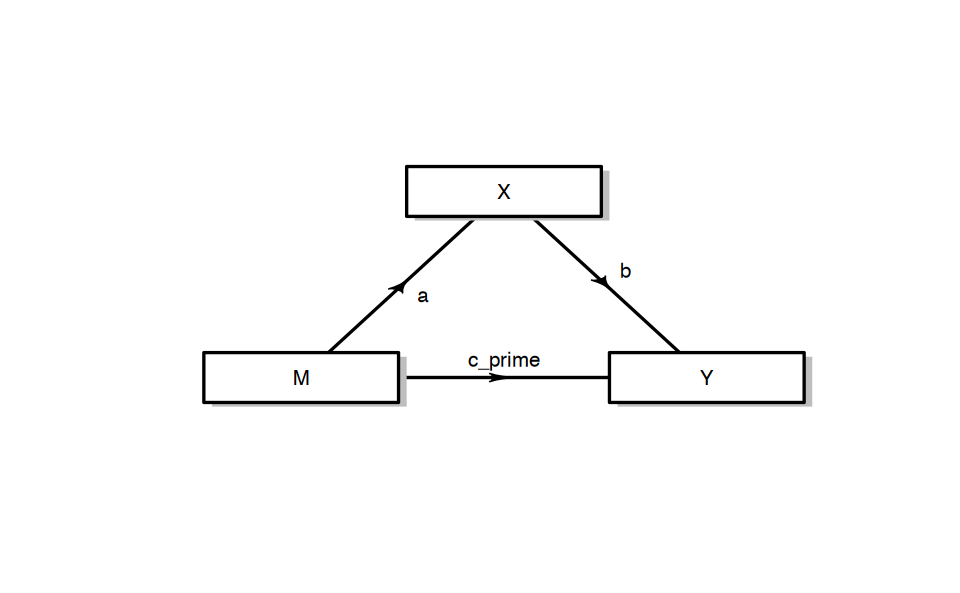

In [27]:
data <- c(
    0, "a", 0,
    0, 0, 0,
    "b", "c_prime", 0
)
M <- matrix(nrow = 3, ncol = 3, byrow = TRUE, data = data)
plot <- plotmat(M,
    pos = c(1, 2),
    name = c("X", "M", "Y"),
    box.type = "rect", box.size = 0.12, box.prop = 0.5, curve = 0
)

Nel modello di mediazione di base abbiamo tre variabili chiave: la variabile indipendente $X$, la variabile dipendente $Y$ e il mediatore $M$. La freccia da $X$ a $M$ (etichettata con 'a') rappresenta l'effetto di $X$ su $M$. La freccia da $M$ a $Y$ (etichettata con 'b') rappresenta l'effetto di $M$ su $Y$, mentre la freccia tratteggiata da $X$ a $Y$ (etichettata con "c'") rappresenta l'effetto diretto di $X$ su $Y$, escludendo la mediazione di $M$.

Possiamo formalizzare il modello statistico di mediazione in equazioni di regressione lineare come segue:

$$M = a_0 + a \times X + e_M$$

$$Y = b_0 + b \times M + c' \times X + e_Y$$

Nella prima equazione lineare, $M$ è regredito su $X$ con un'intercetta$a_0$, pendenza$a$e termine di errore$e_M$. Questa equazione rappresenta il percorso $X \rightarrow M$con$a$come effetto di$X$su$M$. Nella seconda equazione, $Y$ è regredito su $M$ e $X$ con un'intercetta $b_0$, pendenze $b$ e $c'$ e termine di errore $e_Y$. Questa equazione rappresenta due percorsi: $M \rightarrow Y$ e $X \rightarrow Y$, con $b$ come effetto di $M$ su $Y$ e $c'$ come effetto diretto di $X$ su $Y$.

Nel contesto della modellazione di equazioni strutturali, il metodo più comune per calcolare gli effetti diretti, indiretti e totali si basa sul prodotto dei coefficienti, come riassunto nelle seguenti formule:

- Effetto diretto = $c'$
- Effetto indiretto = $b \times a$
- Effetto totale = $c' + b \times a$


### Stima degli Effetti Diretti, Indiretti e Totali

Le tecniche di modellazione di equazioni strutturali permettono di stimare tutti i parametri (a, b, c') simultaneamente, date le specifiche del modello per i dati. Di conseguenza, possiamo utilizzare le seguenti formule per stimare gli effetti diretti, indiretti e totali dai dati:

- Effetto diretto = $\hat{c}'$
- Effetto indiretto = $\hat{b} \times \hat{a}$
- Effetto totale = $\hat{c}' + \hat{b} \times \hat{a}$

dove $\hat{a}$ è una stima di $a$, e così via. Gli errori standard stimati di questi effetti possono poi essere calcolati utilizzando metodi asintotici standard, supportato dalla maggior parte dei software SEM.

### Analisi con `lavaan`

Il caso presente prende in considerazione BFLX come variabile endogena, MNF come variabile esogena e END come variabile mediatrice. Utilizzando Mplus, Barbeau, Boileau, Sarr e Smith (2019) hanno identificato i seguenti coefficienti di percorso: $a = 0.37$, $b = 0.29$ e $c = 0.34$.

Procediamo con l'analisi utilizzando il pacchetto `lavaan` in R. Cominciamo definendo il modello di mediazione.

In [28]:
mod <- "
  # direct effect
  BFLX ~ c*MNF
  # mediator
  BFLX ~ b*END
  END ~ a*MNF

  # indirect effect (a*b)
  ab := a*b
  # total effect
  total := c + (a*b)
"

Adattiamo il modello ai dati.

In [29]:
fit <- sem(
    mod,
    sample.cov = dat_cov,
    sample.nobs = 192
)

Esaminiamo i risultati:

In [31]:
summary(fit, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6-19 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         5

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                               125.849
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -480.945
  Loglikelihood unrestricted model (H1)       -480.945
                                                  

Generiamo un diagramma di percorso.

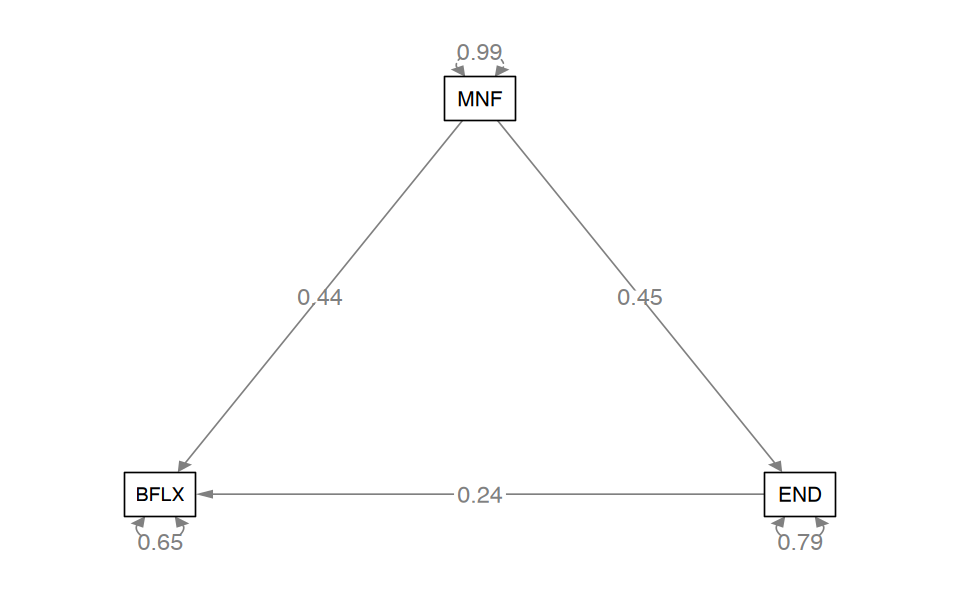

In [32]:
semPlot::semPaths(
    fit,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)

I coefficienti di percorso sono simili, ma non identici, a quelli trovati con Mplus. 

L'effetto diretto di MNF (Need Frustration) su  BFLX (Body Inflexibility) è uguale a 0.44.  L'effetto totale è $0.44 + 0.45*0.24 = 0.55$. L'effetto di mediazione è uguale a $0.45*0.24 = 0.109$. L'outout di `lavaan` fornisce anche gli errori standard e il test che tali effetti siano uguali a zero.

Le correlazioni tra le variabili sono esprimibili nei termini dei coefficienti di percorso.  Per esempio la correlazionetra BFLX e MNF è

In [33]:
.44 + .45 * .24

[1] 0.548

La correlazione tra BFLX e END è

In [34]:
.24 + .44 * .45

[1] 0.438

L'output di lavaan fornisce anche la porzione di varianza che viene spiegata dalle variabili esogene per le due variabili endogene nel modello.

Per esempio, la varianza spiegata di `END` è

In [35]:
0.45^2

[1] 0.2025

come riportato dall'output di lavaan.  

Continuiamo con l'analisi di questi dati e esaminiamo ora un modello di path analisi più complesso (Fig. 4 di Barbeau et al., 2019). Usando la sintassi di `lavaan`, il modello diventa

In [36]:
# BFLX – Body Inflexibility,
# END – Endorsement of Societal Beliefs about Thinness and Obesity,
# MNS – Mean Need Satisfaction,
# MNF – Mean Need Frustration,
# BULS – Bulimic Symptoms
mod <- "
  BULS ~ MNF + BFLX
  BFLX ~ END + MNF
  END ~ MNS + MNF
"

Adattiamo il modello ai dati.

In [37]:
fit2 <- sem(
    mod,
    sample.cov = dat_cov,
    sample.nobs = 192
)

Esaminiamo la soluzione ottenuta.

In [38]:
summary(fit2, fit.measures = TRUE, standardized = TRUE, rsquare = TRUE) |>
    print()

lavaan 0.6-19 ended normally after 1 iteration

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9

  Number of observations                           192

Model Test User Model:
                                                      
  Test statistic                                 8.229
  Degrees of freedom                                 3
  P-value (Chi-square)                           0.042

Model Test Baseline Model:

  Test statistic                               239.501
  Degrees of freedom                                 9
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.977
  Tucker-Lewis Index (TLI)                       0.932

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)               -700.169
  Loglikelihood unrestricted model (H1)       -696

Generiamo il diagramma di percorso.

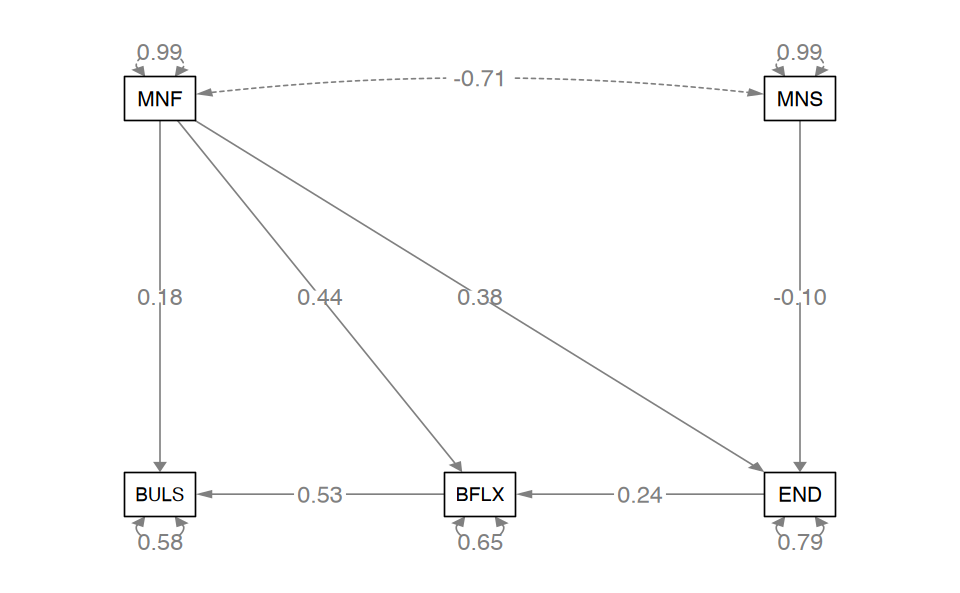

In [39]:
semPlot::semPaths(
    fit2,
    layout = "tree", sizeMan = 7, sizeInt = 5, style = "ram",
    residuals = TRUE, intAtSide = FALSE, edge.label.cex = 1.15,
    whatLabels = "est", nCharNodes = 0, normalize = FALSE
)

Anche in questo caso i coefficienti di percorso sono simili, ma non identici, a quelli riportati da Barbeau et al. (2019). Gli autori riportano una varianza spiegata di END pari a 0.209; con `lavaan` si ottiene 0.208.  Per BFLX gli autori riportano 0.292; `lavaan` ottiene 0.349. Per BULS gli autori riportano 0.478; con `lavaan` si ottiene 0.419. 

Calcoliamo, ad esempio, la correlazione tra MNF e BULS prevista dal modello, combinando gli effetti diretti e indiretti. Questo processo consiste nel sommare gli effetti diretti tra queste due variabili con quelli indiretti mediati da altre variabili nel modello.

In [40]:
-.71 * -.10 * .24 * .53 +
.38 *.24 * .53 +
.44 * .53 +
.18

[1] 0.4705672

Il valore trovato corrisponde bene al valore osservato nel campione, che è pari a 0.47.

## Modellare le Medie

In un modello di equazioni strutturali (SEM), modellare le medie è un processo che si concentra sulla stima e sull'analisi delle medie delle variabili all'interno del modello. Questo processo è fondamentale per comprendere il comportamento medio delle variabili in studio e per integrare queste informazioni nella struttura complessiva del modello SEM.

1. **Raccolta dei Dati:** Per iniziare, è necessario avere a disposizione i dati grezzi o una matrice di covarianza che riassuma le relazioni tra le variabili, oltre alle medie di tutte le variabili. Questi dati servono come input fondamentale per il modello SEM.

2. **Specifica del Modello:** Nel definire il modello SEM, è cruciale specificare che il modello deve considerare sia la struttura di covarianza (le relazioni tra le variabili) sia la struttura di media (le medie delle variabili). Questo assicura che il modello analizzi sia le relazioni tra le variabili sia i loro valori medi.

3. **Inclusione delle Interfacce e delle Medie:** Nel modello, le variabili endogene (quelle che sono influenzate da altre nel modello) richiedono l'inclusione delle intercette, mentre per le variabili esogene (quelle che non sono influenzate da altre nel modello) si considerano le loro medie.

4. **Specificare la Costante “1”:** Per modellare le medie, si include la costante “1” nell'equazione per tutte le variabili misurate, sia esogene sia endogene. Questo passaggio è fondamentale per dire al software di SEM di considerare le medie nelle sue analisi.

5. **Uso di Software SEM (es. `lavaan`):** In software come `lavaan`, si può utilizzare una sintassi specifica (ad es. `meanstructure = true`) per automatizzare l'inclusione delle medie. Questo comando dice al software di aggiungere la costante “1” alle equazioni, facilitando il processo di modellazione delle medie.

6. **Calcolo del Numero di Osservazioni e Parametri Liberi:** Quando si modella sia la struttura di covarianza sia quella di media, è importante calcolare correttamente il numero di osservazioni e parametri liberi nel modello. Si utilizza una formula specifica per determinare questi numeri, considerando il numero di variabili osservate.

### Interpretazione delle Medie Previste

In un modello SEM, la struttura di covarianza genera "covarianze previste", che possono essere confrontate con le covarianze effettivamente osservate nei dati. Analogamente, la struttura di media del modello produce "medie previste" (o "medie adattate"), che si possono confrontare con le medie osservate delle variabili. 

Il "residuo di media" è fondamentalmente la differenza tra la media osservata e la media prevista per una specifica variabile. Quando i gradi di libertà (df) sono zero per la struttura di media (come può accadere in alcune analisi), tutti i residui di media risultano essere zero. Questo significa che le medie previste dal modello corrispondono esattamente alle medie osservate. Tuttavia, se i gradi di libertà non sono zero, potrebbero esserci delle discrepanze tra le medie previste e quelle osservate.

Per calcolare la media prevista di una variabile target nel modello, si seguono questi passaggi:

1. Si inizia con il coefficiente del percorso diretto dalla costante "1" al target. Questo coefficiente rappresenta l'intercetto nella regressione della variabile target sulle altre variabili. In pratica, è un valore che indica la media prevista della variabile target quando tutte le altre variabili indipendenti nel modello sono a zero.

2. Si aggiunge a questo il contributo di ogni "variabile genitore" (ovvero, una variabile che influisce sul target). Per ogni genitore, si moltiplica la media prevista di quel genitore per il coefficiente del percorso che collega il genitore alla variabile target. Questa operazione si ripete per tutti i genitori e i risultati si sommano insieme.

Il risultato finale di questo processo è la media prevista per la variabile target nel modello SEM. Questa media prevista è un elemento cruciale per valutare l'aderenza del modello ai dati osservati, confrontando le medie previste con quelle effettivamente osservate.

## Commenti e considerazioni finali

Il diagramma di un modello parametrico funge anche da mezzo di comunicazione, in quanto un diagramma completo rappresenta essenzialmente un insieme di istruzioni visive su come specificare il modello nella sintassi per computer. Ogni parametro del modello, sia libero sia fisso (ad esempio, le costanti di scala), è rappresentato nei diagrammi basati sul simbolismo grafico RAM di McArdle-McDonald, il quale può anche aiutare i ricercatori che stanno imparando l'analisi SEM a comprendere meglio l'analisi.

In pratica, questo significa che guardando il diagramma di un modello parametrico, un ricercatore può ottenere una guida visiva chiara su come impostare e strutturare il modello all'interno di un software di analisi SEM. Ogni elemento del diagramma, come le frecce e i nodi, e ogni annotazione, come le etichette dei parametri o le costanti, fornisce informazioni specifiche su come ciascuna parte del modello dovrebbe essere codificata nella sintassi del software. Questo approccio visuale facilita la comprensione dei complessi rapporti tra le variabili e dei diversi componenti del modello, rendendo più accessibile l'apprendimento e l'applicazione dell'analisi SEM.

Utilizzando l'analisi dei percorsi per decomporre la correlazione o la covarianza, disponiamo di un metodo efficace per delineare le associazioni tra le variabili e mappare le loro potenziali connessioni causali. Questo strumento si rivela particolarmente utile per descrivere in modo chiaro e strutturato le relazioni tra diverse variabili, facilitando l'interpretazione dei loro legami e interazioni all'interno del modello considerato.


## Session Info

In [41]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS 15.0.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods  
[7] base     

other attached packages:
 [1] diagram_1.6.5     shape_1.4.6.1     rsvg_2.6.1       
 [4] DiagrammeRsvg_0.1 lavaanPlot_0.8.1  lavaanExtra_0.2.1
 [7] nortest_1.0-4     MASS_7.3-61       ggokabeito_0.1.0 
[10] viridis_0.6.5     viridisLite_0.4.2 ggpubr_0.6.0     
[13] ggExtra_0.10.1    gridExtra_2.3     patchwork_1.3.0  
[16] bayesplot_1.11.1  semTools_0.5-6    semPlot_1.1.6    
[19] lavaan_0.6-19     psych_2.4.6.26    scales_1.3.0     
[22] markdown_1.13     knitr_1.48        lubridate_1.9.3  
[25] forcats_1.